<a href="https://colab.research.google.com/github/ranjan717/Machine_learning_Projects/blob/main/ML_Regression_(SLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple linear regression -  Involving only 2 variables

In [11]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [3]:
# Provide the path to your Excel file
file_path = '/Exam_Score.xlsx'

# Now you can use the file_path variable with pandas
df = pd.read_excel(file_path)
df.head()



,Study hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


from matplotlib import pyplot as plt
_df_0['Study hours'].plot(kind='hist', bins=20, title='Study hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Scores'].plot(kind='hist', bins=20, title='Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Study hours', y='Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Study hours'].plot(kind='line', figsize=(8, 4), title='Study hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Scores'].plot(kind='line', figsize=(8, 4), title='Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

Conditions for Simple Linear regression


1.  Y has a Linear relationship with X
2.  Independence of observations
    *   The observations should be independent of each other.

    *   If data points are correlated (e.g., time series data), adjustments like autocorrelation tests or different models may be needed.List item

3.  Normality of residuals

4.  Homoscedacity(Constant variance of errors)
    *   The variance of residuals should be constant across all values of the independent variable.
    *   If variance changes (heteroscedasticity), transformations or weighted regression may be required.

5.  No multicolinearity i.e independent variables should not be highly correlated, however in simple LR theres only one independent varibale so its not a concern.

6.  No outlier

7. Adequate sample size





1.Check Linearity

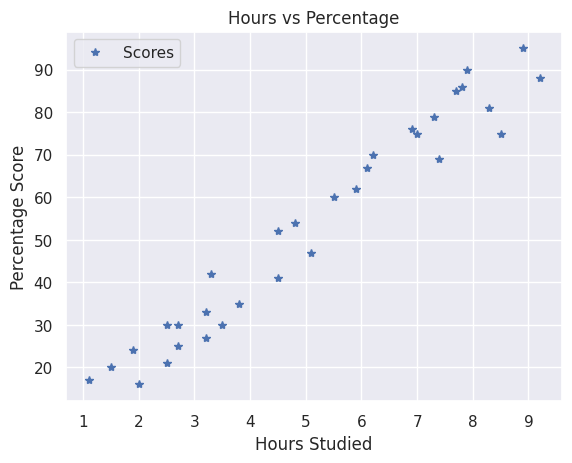

In [8]:
df.plot(x='Study hours', y='Scores', style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

2.Check Multicollinearity

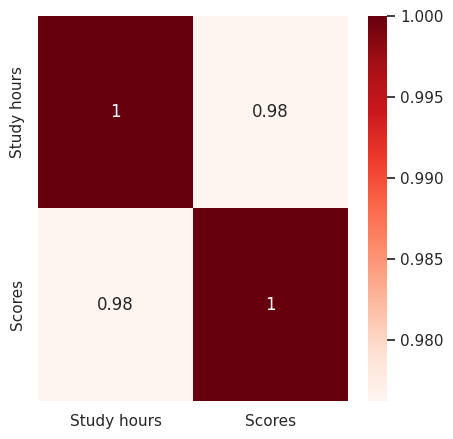

In [6]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(5,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

3. Check Normlity of residuals

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     609.1
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.75e-21
Time:                        07:45:09   Log-Likelihood:                -99.460
No. Observations:                  32   AIC:                             202.9
Df Residuals:                      30   BIC:                             205.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2696      2.324      0.546      

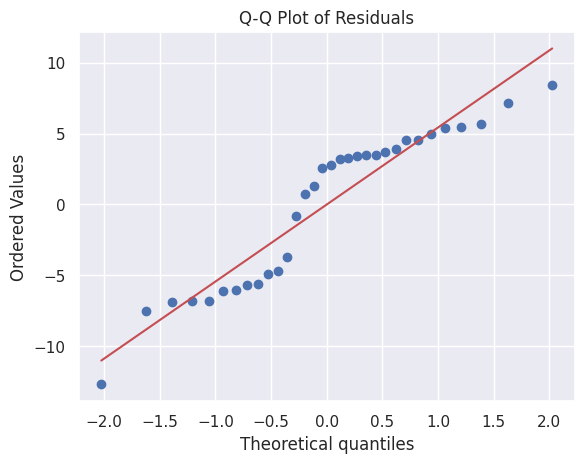

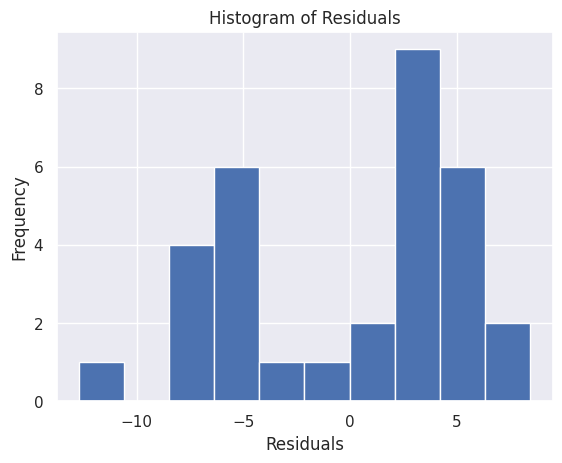

In [9]:
# Fit the linear regression model
X = df['Study hours']
y = df['Scores']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# Get the residuals
residuals = est2.resid

# Create a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Create a histogram of residuals
plt.hist(residuals, bins=10)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


4.Check Outlier

Outliers in 'Study hours':
Empty DataFrame
Columns: [Study hours, Scores, Study hours_zscore, Scores_zscore]
Index: []

Outliers in 'Scores':
Empty DataFrame
Columns: [Study hours, Scores, Study hours_zscore, Scores_zscore]
Index: []


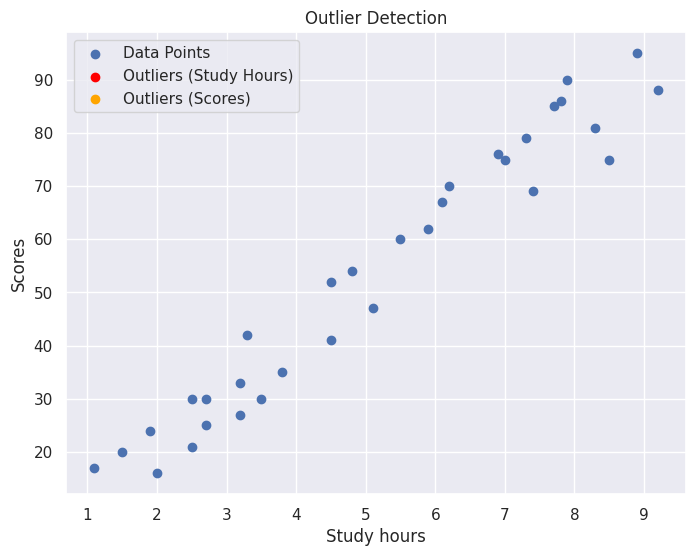

In [12]:
# Calculate z-scores for 'Study hours' and 'Scores'
df['Study hours_zscore'] = np.abs(stats.zscore(df['Study hours']))
df['Scores_zscore'] = np.abs(stats.zscore(df['Scores']))

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify outliers based on the threshold
outliers_study_hours = df[df['Study hours_zscore'] > threshold]
outliers_scores = df[df['Scores_zscore'] > threshold]

# Print or visualize the outliers
print("Outliers in 'Study hours':")
print(outliers_study_hours)

print("\nOutliers in 'Scores':")
print(outliers_scores)

# You can also visualize the outliers using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Study hours'], df['Scores'], label='Data Points')
plt.scatter(outliers_study_hours['Study hours'], outliers_study_hours['Scores'], color='red', label='Outliers (Study Hours)')
plt.scatter(outliers_scores['Study hours'], outliers_scores['Scores'], color='orange', label='Outliers (Scores)')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.title('Outlier Detection')
plt.legend()
plt.show()


5.Check Homoscedacity

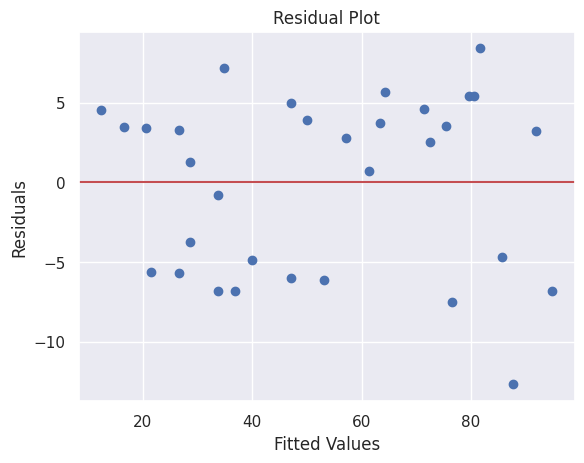

Breusch-Pagan test
{'LM Statistic': np.float64(3.259476697637915), 'LM-Test p-value': np.float64(0.07101178474513159), 'F-Statistic': np.float64(3.4023145612348973), 'F-Test p-value': np.float64(0.07499987923943498)}


In [13]:
# Create a residual plot
plt.scatter(est2.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()

# Formal test for homoscedasticity (e.g., Breusch-Pagan test)
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, est2.model.exog)
print("Breusch-Pagan test")
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

# Interpretation:
# If the p-value of the Breusch-Pagan test is less than your significance level (e.g., 0.05),
# you would reject the null hypothesis of homoscedasticity, indicating heteroscedasticity.
# A visual inspection of the residual plot is also important.


Regrression Step-1 . Separate the independent and dependent variables into X and Y

In [20]:
x = df["Study hours"].values  ## Feature
y = df["Scores"].values    ## Target

Regression Step-2 . Reshape the independent variable from 1D to 2D because sci-kit learn expects the it to be in 2D array.

In [23]:
x=x.reshape(-1,1)  ## Convert 1D array to 2D

Regression Step-3 .Split the data into train set and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Regression Step-4 . Train the algorithm with train data

In [54]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

Regression Step-5 .Check the intercept and slope of the best fit line

In [55]:
print(model_1.intercept_)  ## Value of Y when X=0

1.7320976768043224


In [56]:
print(model_1.coef_)

[9.60538525]


Insight : This means that for every one unit of change in hours studied, the change in the score is about 10%

Regression Step-6 .Make predictions

In [57]:
y_pred = model_1.predict(X_test)
y_pred

array([58.40387065, 38.23256162, 75.6935641 , 32.46933047, 25.7455608 ,
       12.29802145, 44.9563313 ])

Regression Step-7 . Compare the actual vs Predicted dependent values

In [58]:
r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
r

,Actual,Predicted
0,62,58.403871
1,35,38.232562
2,85,75.693564
3,27,32.469330
4,30,25.745561
5,17,12.298021
6,52,44.956331


Regression Step-8 .Check the performance of the model

1. Mean Squared Error (MSE)

    Measures the average squared error between actual and predicted values.

    Lower MSE means better model performance.

    Sensitive to outliers because errors are squared.

2. Root Mean Squared Error (RMSE)

    Square root of MSE, making it easier to interpret in the same units as y.

    Lower RMSE means better predictions.

    More interpretable than MSE since it's in the same scale as the target variable.

3. Mean Absolute Error (MAE)

    Measures the average absolute error between actual and predicted values.

    Less sensitive to outliers than MSE.

    Easier to interpret as it represents the average error magnitude.

4. R² Score (Coefficient of Determination)

    Measures how well the model explains variance in the data.

    Ranges from 0 to 1 (higher is better).

    Negative R² means the model is worse than predicting the mean.

5. Adjusted R² (For Multiple Regression)

    Adjusts R² for the number of predictors (p).

    Useful for multiple regression to avoid overfitting.

6. Mean Absolute Percentage Error (MAPE)

    Expresses error as a percentage, useful for business applications.

    Not ideal when y has values close to zero.

Which Metric to Use?

    MSE & RMSE → If large errors need to be penalized.

    MAE → If you want a simple, interpretable error measure.

    R² & Adjusted R² → To measure overall model fit.

    MAPE → If percentage-based accuracy is needed.

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  #average of absolute errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square:', r2_score(y_test, y_pred))

Mean Absolute Error: 5.372077686305602
Mean Squared Error: 32.818149997754
Root Mean Squared Error: 5.728712769702632
R square: 0.9317101516099054


Regression Step-9 . Improve performance by cross validation

In [60]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(df, test_size=0.50, random_state = 5)

x = df["Study hours"].values.reshape(-1,1)
y = df["Scores"].values

X_train, X_v, y_train, y_v = train_test_split(x, y, test_size=0.5, random_state=5)
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

print(model_2.intercept_,model_2.coef_)

1.7320976768043224 [9.60538525]


K-fold cross validation

In [39]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=4)
scores

array([0.93918007, 0.83866212, 0.9816353 , 0.9461028 ])

In [48]:
# can tune other metrics, such as MSE
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
scores

array([-4.72248946, -7.32849236, -4.24283878, -3.63859442, -7.45763091])

In [61]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

In [68]:

import numpy as np
# Evaluate the final_model on the test set
y_pred_model_2 = model_2.predict(X_test)

# Calculate performance metrics
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)
mae_final = metrics.mean_absolute_error(y_test, y_pred_final)

print(f"Model_2 Performance:")
print(f"Mean Squared Error: {mse_final}")
print(f"Root Mean Squared Error: {rmse_final}")
print(f"R-squared: {r2_final}")
print(f"Mean Absolute Error: {mae_final}")


Model_2 Performance:
Mean Squared Error: 32.818149997754
Root Mean Squared Error: 5.728712769702632
R-squared: 0.9317101516099054
Mean Absolute Error: 5.372077686305602


The Score Prediction Engine

In [67]:
import ipywidgets as widgets
from IPython.display import display

def predict_score(study_hours, model):
  """Predicts the score based on study hours and the selected model."""
  study_hours_2d = np.array(study_hours).reshape(-1, 1)
  predicted_score = model.predict(study_hours_2d)
  return predicted_score[0]

# Create a dropdown widget for model selection
model_dropdown = widgets.Dropdown(
    options=[('model_1', model_1), ('model_2', model_2)],
    value=model_1,
    description='Select Model:',
)

# Create an output widget to display the predicted score
output_widget = widgets.Output()

# Create an interactive function to handle user input and prediction
def predict_and_display(study_hours):
  """Predicts the score and displays the result."""
  predicted_score = round(predict_score(study_hours, model_dropdown.value), 0)

  # Update the output widget with the predicted score
  with output_widget:
    output_widget.clear_output()  # Clear previous output
    print(f"Predicted score for {study_hours} hours of study using {model_dropdown.label} is {predicted_score}")

# Create an interactive input widget for study hours
study_hours_input = widgets.FloatText(
    value=0,
    description='Study Hours:',
    disabled=False
)

# Link the widgets to the interactive function
widgets.interactive(predict_and_display, study_hours=study_hours_input)

# Display the widgets and the output widget
display(model_dropdown, study_hours_input, output_widget)

Dropdown(description='Select Model:', options=(('model_1', LinearRegression()), ('model_2', LinearRegression()…

FloatText(value=0.0, description='Study Hours:')

Output()